# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Change the name of file with your roll no.



In [2]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 4: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

BayesA) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

BayesB) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

BayesC) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*



In [3]:
# Cell type : CodeWrite

def function_for_A(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption BayesA.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = X_train.shape[0]               # number of data points  
    d = X_train.shape[1]               # number of features
    n_n = np.count_nonzero(Y_train==-1)# number of negative class data points 
    n_p = np.count_nonzero(Y_train==1) # number of positive class data points
    
    # Prior Probabilities
    prior_probab_n = n_n/n
    prior_probab_p = n_p/n
    
    # Seperating the training dataset between classes
    X_n = np.take(X_train,np.where(Y_train==-1)[0],axis=0)
    X_p = np.take(X_train,np.where(Y_train==1)[0],axis=0)
    
    # Calculating mean and covariance matrix
    mean_n = sum(X_n)/n_n
    mean_p = sum(X_p)/n_p
    cov_matrix = np.identity(d)
    
    # Test prediction
    Y_test_pred = []
    for X in X_test:
        post_dist_n = (1/(((2*np.pi)**(d/2))*((np.linalg.det(cov_matrix))**(1/2))))*np.exp((-1/2)*(X-mean_n)@(np.linalg.inv(cov_matrix))@(np.transpose(X-mean_n)))
        post_dist_p = (1/(((2*np.pi)**(d/2))*((np.linalg.det(cov_matrix))**(1/2))))*np.exp((-1/2)*(X-mean_p)@(np.linalg.inv(cov_matrix))@(np.transpose(X-mean_p)))
        post_probab_n = prior_probab_n*post_dist_n/(prior_probab_n*post_dist_n + prior_probab_p*post_dist_p)
        post_probab_p = prior_probab_p*post_dist_p/(prior_probab_n*post_dist_n + prior_probab_p*post_dist_p)
        if post_probab_p > post_probab_n:
            Y_test_pred.append(1)
        elif post_probab_n > post_probab_p:
            Y_test_pred.append(-1)
    
    return np.array(Y_test_pred)
    
        
def function_for_B(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption BayesB.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = X_train.shape[0]               # number of data points
    d = X_train.shape[1]               # number of features
    n_n = np.count_nonzero(Y_train==-1)# number of negative class data points
    n_p = np.count_nonzero(Y_train==1) # number of positive class data points
    
    # Prior Probabilities
    prior_probab_n = n_n/n
    prior_probab_p = n_p/n
    
    # Seperating the training dataset between classes
    X_n = np.take(X_train,np.where(Y_train==-1)[0],axis=0)
    X_p = np.take(X_train,np.where(Y_train==1)[0],axis=0)
    
    # Calculating mean and covariance matrix
    mean_n = sum(X_n)/n_n
    mean_p = sum(X_p)/n_p
    #Covariance matrix
    r = np.zeros((n,d))
    for i in range(0,n):
        if Y_train[i] == -1:
            r[i] = X_train[i] - mean_n
        else:
            r[i] = X_train[i] - mean_p
    cov_matrix = (1/n)*np.transpose(r)@r
    
    # Test prediction
    Y_test_pred = []
    for X in X_test:
        post_dist_n = (1/(((2*np.pi)**(d/2))*((np.linalg.det(cov_matrix))**(1/2))))*np.exp((-1/2)*(X-mean_n)@(np.linalg.inv(cov_matrix))@(np.transpose(X-mean_n)))
        post_dist_p = (1/(((2*np.pi)**(d/2))*((np.linalg.det(cov_matrix))**(1/2))))*np.exp((-1/2)*(X-mean_p)@(np.linalg.inv(cov_matrix))@(np.transpose(X-mean_p)))
        post_probab_n = prior_probab_n*post_dist_n/(prior_probab_n*post_dist_n + prior_probab_p*post_dist_p)
        post_probab_p = prior_probab_p*post_dist_p/(prior_probab_n*post_dist_n + prior_probab_p*post_dist_p)
        if post_probab_p > post_probab_n:
            Y_test_pred.append(1)
        elif post_probab_n > post_probab_p:
            Y_test_pred.append(-1)
    
    return np.array(Y_test_pred)


def function_for_C(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption BayesC.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = X_train.shape[0]               # number of data points
    d = X_train.shape[1]               # number of features
    n_n = np.count_nonzero(Y_train==-1)# number of negative class data points
    n_p = np.count_nonzero(Y_train==1) # number of positive class data points
    
    # Prior Probabilities
    prior_probab_n = n_n/n
    prior_probab_p = n_p/n
    
    # Seperating the training dataset between classes
    X_n = np.take(X_train,np.where(Y_train==-1)[0],axis=0)
    X_p = np.take(X_train,np.where(Y_train==1)[0],axis=0)
    
    # Calculating mean and covariance matrix
    mean_n = sum(X_n)/n_n
    cov_matrix_n = (1/n_n)*np.transpose(X_n-mean_n)@(X_n-mean_n)
    mean_p = sum(X_p)/n_p
    cov_matrix_p = (1/n_p)*np.transpose(X_p-mean_p)@(X_p-mean_p)
    
    # Test Prediction
    Y_test_pred = []
    for X in X_test:
        post_dist_n = (1/(((2*np.pi)**(d/2))*((np.linalg.det(cov_matrix_n))**(1/2))))*np.exp((-1/2)*(X-mean_n)@(np.linalg.inv(cov_matrix_n))@(np.transpose(X-mean_n)))
        post_dist_p = (1/(((2*np.pi)**(d/2))*((np.linalg.det(cov_matrix_p))**(1/2))))*np.exp((-1/2)*(X-mean_p)@(np.linalg.inv(cov_matrix_p))@(np.transpose(X-mean_p)))
        post_probab_n = prior_probab_n*post_dist_n/(prior_probab_n*post_dist_n + prior_probab_p*post_dist_p)
        post_probab_p = prior_probab_p*post_dist_p/(prior_probab_n*post_dist_n + prior_probab_p*post_dist_p)
        if post_probab_p > post_probab_n:
            Y_test_pred.append(1)
        elif post_probab_n > post_probab_p:
            Y_test_pred.append(-1)
    
    
    return np.array(Y_test_pred)

In [4]:
# Cell type : Convenience

# Testing the functions above

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 
# try to remove everything or comment out your lines before submitting.


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = function_for_A(X_train, Y_train, X_test)
Y_pred_test_1b = function_for_B(X_train, Y_train, X_test)
Y_pred_test_1c = function_for_C(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 4

#### 4a) Run the above three algorithms (BayesA,B and C), for the two datasets given (datasetA.npz, datasetB.npz) in the cell below.
#### In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 2 as follows: One plot for each dataset, with 3 subplots in each for the three classifiers. Label the 6 plots appropriately.





{'error rate for BayesA classifier on dataset_1': 0.066, 'error rate for BayesB classifier on dataset_1': 0.0675, 'error rate for BayesC classifier on dataset_1': 0.0335, 'error rate for BayesA classifier on dataset_2': 0.5085, 'error rate for BayesB classifier on dataset_2': 0.504, 'error rate for BayesC classifier on dataset_2': 0.0745}


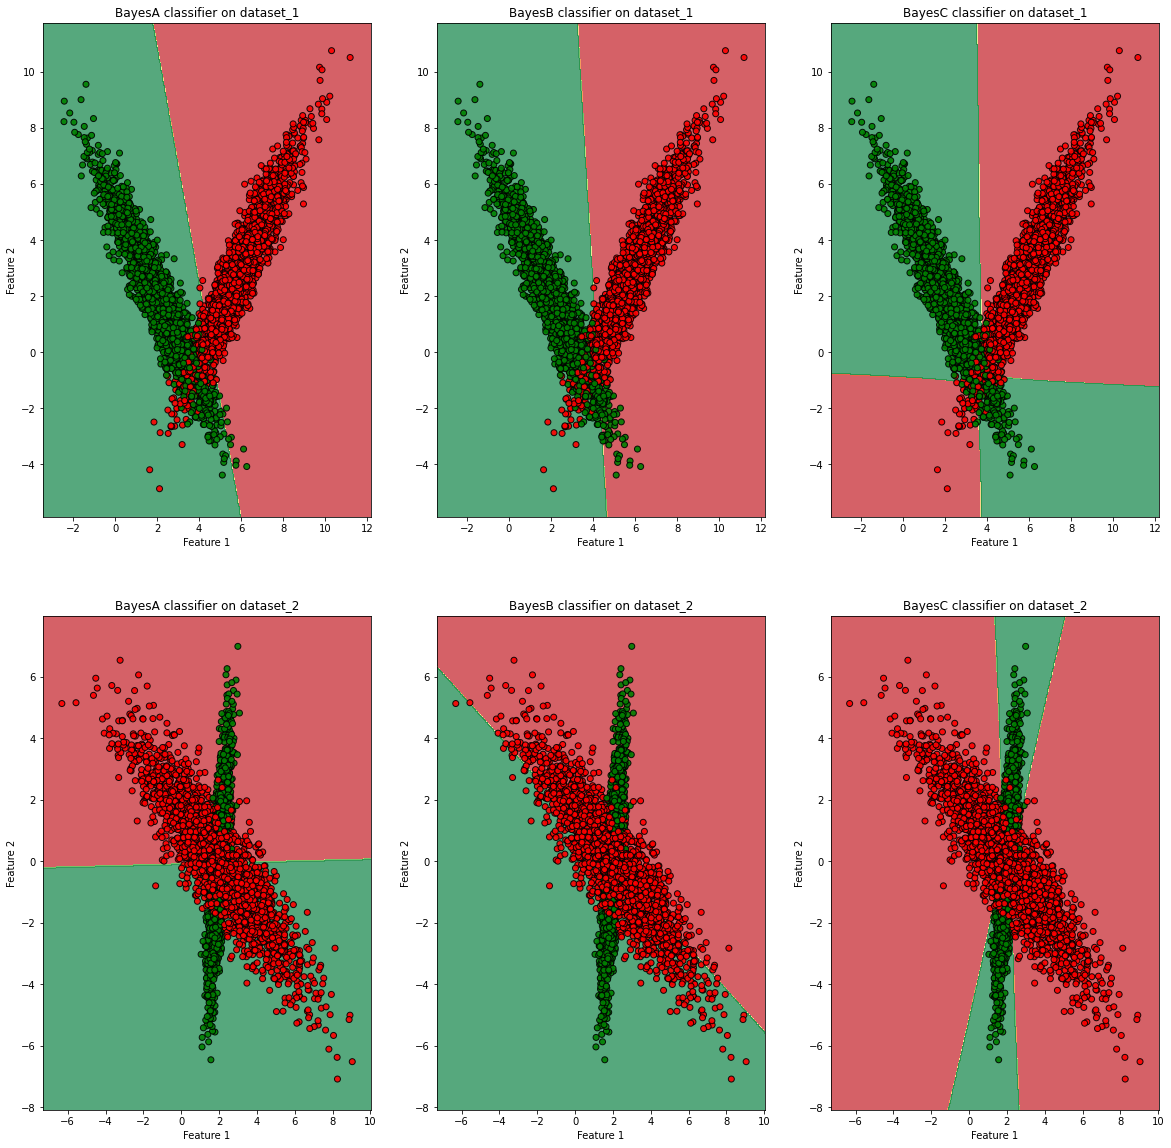

In [5]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

dataset_1 = np.load(r'C:\Users\kapil\Documents\PRML\code\datasetA.npz')
X_train_1 = dataset_1['arr_0']
Y_train_1 = dataset_1['arr_1'] 
X_test_1 = dataset_1['arr_2']
Y_test_1 = dataset_1['arr_3']

dataset_2 = np.load(r'C:\Users\kapil\Documents\PRML\code\datasetB.npz')
X_train_2 = dataset_2['arr_0']
Y_train_2 = dataset_2['arr_1'] 
X_test_2 = dataset_2['arr_2']
Y_test_2 = dataset_2['arr_3']

Y_test_pred_1A = function_for_A(X_train_1, Y_train_1, X_test_1)
Y_test_pred_1B = function_for_B(X_train_1, Y_train_1, X_test_1)
Y_test_pred_1C = function_for_C(X_train_1, Y_train_1, X_test_1)

Y_test_pred_2A = function_for_A(X_train_2, Y_train_2, X_test_2)
Y_test_pred_2B = function_for_B(X_train_2, Y_train_2, X_test_2)
Y_test_pred_2C = function_for_C(X_train_2, Y_train_2, X_test_2)

X_train_datasets = [X_train_1,X_train_2]
Y_train_datasets = [Y_train_1,Y_train_2]
X_test_datasets = [X_test_1,X_test_2]
Y_test_datasets = [Y_test_1,Y_test_2]
Y_pred_datasets = [[Y_test_pred_1A,Y_test_pred_1B,Y_test_pred_1C],
                  [Y_test_pred_2A,Y_test_pred_2B,Y_test_pred_2C]]



def plot_fun(ax, classifier, X_train, Y_train, X_test, Y_test):
    
    x1_low_lim, x1_upper_lim  = min(X_train[:,0].min(), X_test[:,0].min()), max(X_train[:,0].max(), X_test[:,0].max())
    x2_low_lim, x2_upper_lim = min(X_train[:,1].min(), X_test[:,1].min()), max(X_train[:,1].max(), X_test[:,1].max())
    
    #mesh
    x1_mesh, x2_mesh = np.meshgrid(np.linspace(x1_low_lim-1, x1_upper_lim+1, 500), np.linspace(x2_low_lim-1, x2_upper_lim+1, 500))
    x_mesh_test_instance = np.concatenate([x1_mesh.reshape(-1,1), x2_mesh.reshape(-1,1)],axis=1)
    z = classifier(X_train, Y_train, x_mesh_test_instance)
    zz = z.reshape(x1_mesh.shape)

    #contour plot
    ax.contourf(x1_mesh, x2_mesh, zz, cmap='RdYlGn', alpha=0.7)
    
    # Scatter plot of X_test with Y_test as the classification parameter
    scattercmp_test = np.array(['g']*Y_test.shape[0])
    scattercmp_test[Y_test < 0] = 'r'
    scattercmp_train = np.array(['g']*Y_train.shape[0])
    scattercmp_train[Y_train < 0] = 'r'
    
    ax.scatter(X_train[:,0], X_train[:,1], c = scattercmp_train, marker='o', edgecolors='k', alpha=0.9)
    ax.scatter(X_test[:,0], X_test[:,1], c = scattercmp_test, marker='o', edgecolors='k', alpha=0.9)
    
    
    #labelling and setting the axis limits
    ax.set_xlim(x1_low_lim-1, x1_upper_lim+1)
    ax.set_ylim(x2_low_lim-1, x2_upper_lim+1)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    return ax


classifiers = [function_for_A, function_for_B, function_for_C]
fig, ([ax1_1, ax1_2, ax1_3], [ax2_1, ax2_2, ax2_3]) = plt.subplots(2,3,sharex=False, sharey=False, figsize=(20,20))
axes = np.array([[ax1_1, ax1_2, ax1_3],[ax2_1, ax2_2, ax2_3]])
error_rate = {}
for i in range(len(X_train_datasets)):
    for j, k in zip(range(len(classifiers)), ['A', 'B', 'C']):
        plot_fun(axes[i][j],classifiers[j],X_train_datasets[i], Y_train_datasets[i], X_test_datasets[i], Y_test_datasets[i])
        axes[i][j].set_title('Bayes{} classifier on dataset_{}'.format(k,i+1))
        
        # Error calculation
        error_rate['error rate for Bayes{} classifier on dataset_{}'.format(k,i+1)] = round(1 - (Y_test_datasets[i].reshape(-1,1) == Y_pred_datasets[i][j].reshape(-1,1)).mean(), 4)
print(error_rate)
plt.show()





####4b) Give the ROC Curves for all the classifiers.



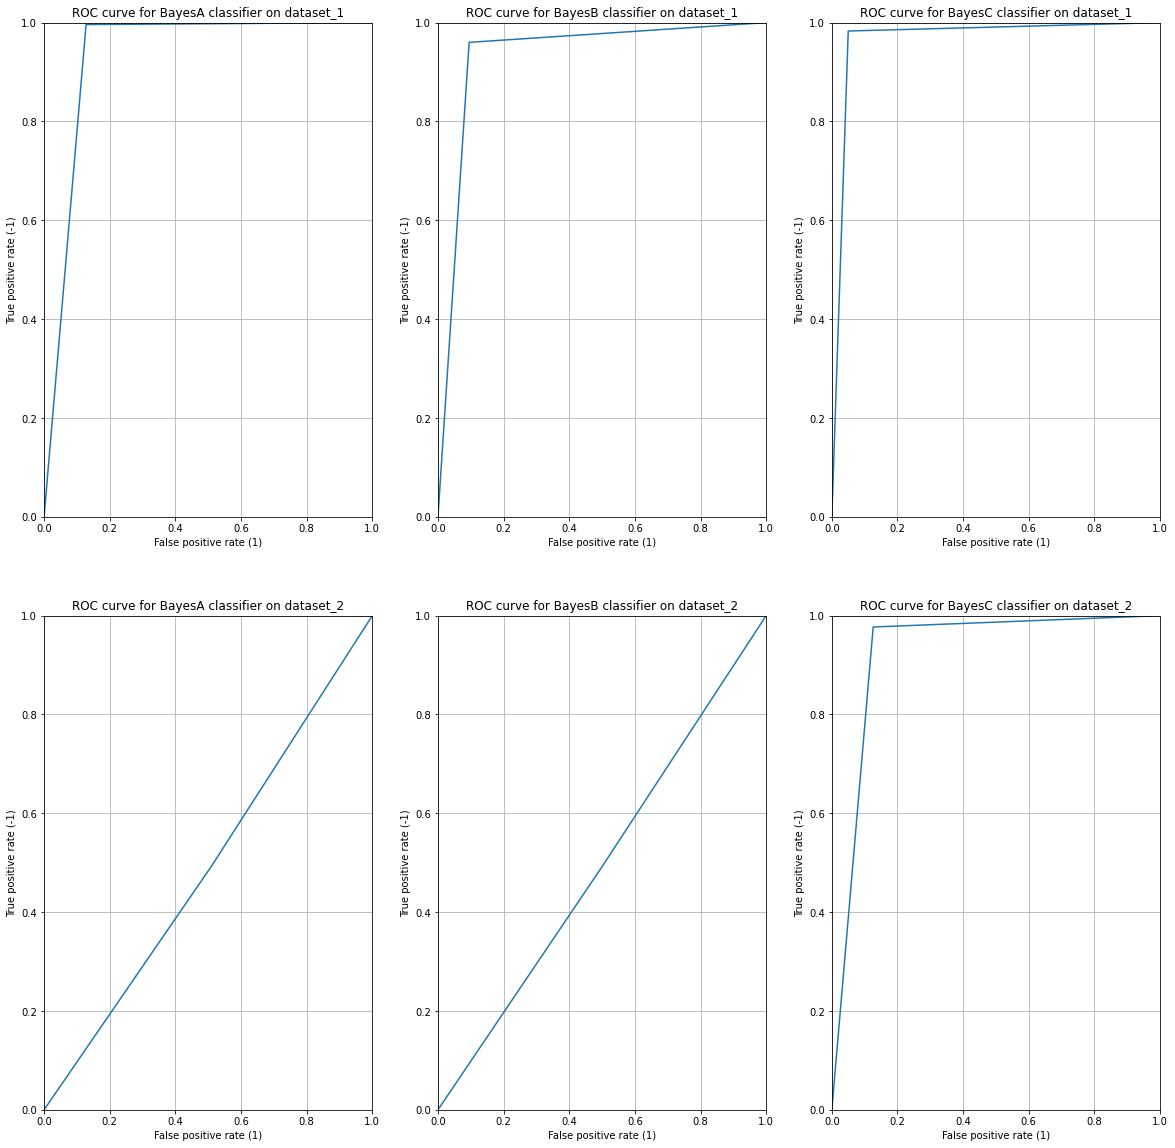

In [6]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
from sklearn.metrics import roc_curve
fig, ([ax1_1, ax1_2, ax1_3], [ax2_1, ax2_2, ax2_3]) = plt.subplots(2,3,sharex=False, sharey=False, figsize=(20,20))
axes = np.array([[ax1_1, ax1_2, ax1_3],[ax2_1, ax2_2, ax2_3]])
for i in range(2):
    for j, k in zip(range(3), ['A', 'B', 'C']):
        fpr,tpr,thresholds=roc_curve(Y_test_datasets[i],Y_pred_datasets[i][j])
        axes[i][j].plot(fpr,tpr)
        axes[i][j].set_xlim([0, 1.0])
        axes[i][j].set_ylim([0, 1.0])
        axes[i][j].set_title('ROC curve for Bayes{} classifier on dataset_{}'.format(k,i+1))
        axes[i][j].set_xlabel('False positive rate (1)')
        axes[i][j].set_ylabel('True positive rate (-1)')
        axes[i][j].grid(True)

####4c) In the next Textwrite cell, give the error rate of the three classifiers on the three datasets as 3x2 table, with appropriately named rows and columns.



**Cell type : TextWrite**
(Write your observations and table of errors here)

{'error rate for BayesA classifier on dataset_A': 0.066, 'error rate for BayesB classifier on dataset_A': 0.0675, 'error rate for BayesC classifier on dataset_A': 0.0335, 'error rate for BayesA classifier on dataset_B': 0.5085, 'error rate for BayesB classifier on dataset_B': 0.504, 'error rate for BayesC classifier on dataset_B': 0.0745}

Table of errors has been added to latex file.

####4d) In the next Textwrite cell, summarise your observations regarding the 6 learnt classifiers.

**Cell type : TextWrite**
(Write your observations and table of errors here)

BayesC classifier is best among all as it gives less error rate for both the datasets when compared to other two classifiers.
We get a linear decision boundary when both classes use same covariance matrix and a non linear decision boundary in case of BayesC classifier where covariance matrix is different for two classes.
BayesA and BayesB classifier gives almost similar result in ROC curve and decision boundary.

A non-parametric density estimation approach could have been used to solve this problem.
Pros:
Non-parametric denisty estimation, on the other hand, require fewer assumptions about the data, and consequently will prove better in situations where the true distribution is unknown or cannot be easily approximated using a probability distribution.

Cons:
We need more amount of data points to accurately estimate true density whereas in parametric relatively you require less.


